<a href="https://colab.research.google.com/github/ipansh/asl-alphabet-classifier/blob/main/ASL_Alphabet_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import tensorflow as tf

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly.express as px

import keras

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

import os # used for navigating to image path
import imageio # used for writing images

import datetime

from PIL import Image
from PIL import ImageFile

##not sure why I need this but I do
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
directory = '/content/drive/MyDrive/ASL Classification/data'

train_images = np.load(os.path.join(directory,'train_images.npy'))
train_labels = np.load(os.path.join(directory, 'train_labels.npy'))

print("Shape of train image dataset: {}".format(train_images.shape))
print("Shape of train label dataset: {}".format(train_labels.shape))

Shape of train image dataset: (16000, 200, 200, 1)
Shape of train label dataset: (16000, 29)


In [6]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters = 16, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu',
                 input_shape=(200, 200, 1)))

model.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model.add(Conv2D(filters = 32, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

model.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model.add(Conv2D(filters = 64, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

model.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model.add(Conv2D(filters = 128, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

#Adding 3 layers for regularization purposes
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(29, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       7

In [7]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 2)

training = model.fit(train_images, train_labels,
          batch_size = 50,
          epochs = 15,
          validation_split=0.3,
          callbacks = [early_stopping_monitor]
          )

Epoch 1/15
224/224 [==============================] - 53s 40ms/step - loss: 3.8006 - accuracy: 0.0797 - val_loss: 2.1065 - val_accuracy: 0.3629
Epoch 2/15
224/224 [==============================] - 8s 37ms/step - loss: 1.8785 - accuracy: 0.4261 - val_loss: 1.4334 - val_accuracy: 0.5675
Epoch 3/15
224/224 [==============================] - 8s 37ms/step - loss: 1.2100 - accuracy: 0.6307 - val_loss: 1.1538 - val_accuracy: 0.6919
Epoch 4/15
224/224 [==============================] - 8s 38ms/step - loss: 0.9488 - accuracy: 0.7132 - val_loss: 0.6916 - val_accuracy: 0.7892
Epoch 5/15
224/224 [==============================] - 8s 37ms/step - loss: 0.7086 - accuracy: 0.7755 - val_loss: 0.5440 - val_accuracy: 0.8323
Epoch 6/15
224/224 [==============================] - 8s 37ms/step - loss: 0.5474 - accuracy: 0.8337 - val_loss: 0.6099 - val_accuracy: 0.8094
Epoch 7/15
224/224 [==============================] - 8s 37ms/step - loss: 0.4401 - accuracy: 0.8619 - val_loss: 0.3289 - val_accuracy: 0.909

In [11]:
training_history_df = pd.DataFrame(training.history)
training_history_df = training_history_df.reset_index().rename(columns = {'index':'epoch'})
training_history_df.loc[:,('epoch')] = [epoch+1 for epoch in training_history_df['epoch']]
training_history_df

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,3.024484,0.164196,2.106492,0.362917
1,2,1.681690,0.485714,1.433382,0.567500
2,3,1.137284,0.651071,1.153830,0.691875
3,4,0.865134,0.732946,0.691575,0.789167
4,5,0.661732,0.790089,0.543996,0.832292
5,6,0.525034,0.835536,0.609934,0.809375
6,7,0.412872,0.868482,0.328860,0.909375
7,8,0.328067,0.896250,0.351901,0.896042
8,9,0.273628,0.913214,0.300368,0.902917
9,10,0.247131,0.922321,0.222741,0.933333


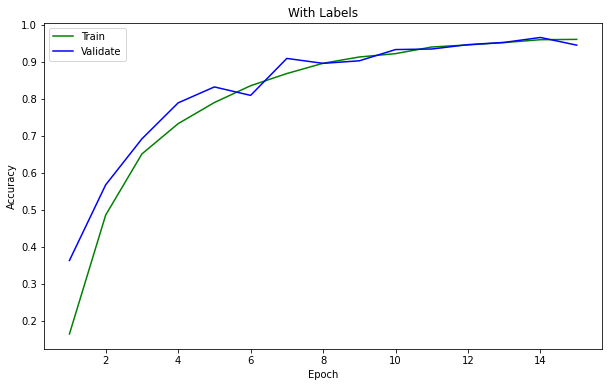

In [12]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

plt.plot(list(range(1,16)), training.history['accuracy'], color='green', label="Train")
plt.plot(list(range(1,16)), training.history['val_accuracy'], color='blue', label="Validate")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("With Labels")

plt.legend(loc='best')
plt.show()

In [13]:
import tensorflow as tf
tf.keras.models.save_model(model, '/content/drive/MyDrive/ASL Classification/model assets/asl_trained_model.h5')